In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error,r2_score


In [10]:
boston=load_boston()
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [12]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [13]:
print(boston.data.shape)

(506, 13)


In [14]:
bos = pd.DataFrame(boston.data)
print(bos.head(2))

         0     1     2    3      4      5     6       7    8      9    10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   

      11    12  
0  396.9  4.98  
1  396.9  9.14  


In [15]:
print(boston.feature_names)
bos.columns = boston.feature_names

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [16]:
#to add taregt variable 
bos['PRICE'] = boston.target
print(bos.shape)

(506, 14)


In [17]:
#ti find dependent and independent varidnle
Y = bos["PRICE"]
X= bos.drop('PRICE',axis = 1)
print(X.head())
print(Y.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64


In [22]:
#training and testing data by dividing into 2 partr
#test size 0.3 means 30% data will tuse fro testing and rest is use for testing
#random_state is use for to make same set when ever you will split the data 
X_train , X_test,Y_train,Y_test  = sklearn.model_selection.train_test_split(X,Y,test_size = 0.3 , random_state= 5)

In [23]:
#linea reg to train data se
lm = LinearRegression()
lm.fit(X_train,Y_train)
Y_train_predect=lm.predict(X_train)
Y_test_predect=lm.predict(X_test)

In [24]:
df=pd.DataFrame(Y_test_predect,Y_test)
print(df.head())
#price wala pridected hai or 0 wala og hai

               0
PRICE           
37.6   37.389977
27.9   31.567942
22.6   27.133739
13.8    6.551176
35.2   33.693108


In [25]:
# mean square Error 
mse = mean_squared_error(Y_test,Y_test_predect)
print(mse)

30.69703770408862


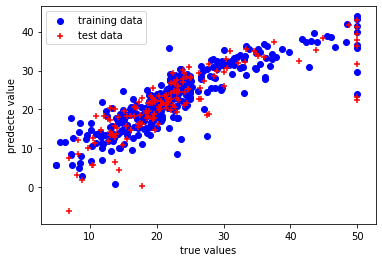

In [26]:
# for ploting scctaer
plt.scatter(Y_train,Y_train_predect,c='b',marker = 'o', label= 'training data')
plt.scatter(Y_test,Y_test_predect,c='red',marker = '+', label= 'test data')
plt.xlabel('true values')
plt.ylabel('predecte value')
plt.legend(loc= 'upper left')
plt.plot()
plt.show()